In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster, HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# File upload in Google Colab
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving flood_risk_dataset_india 4.csv to flood_risk_dataset_india 4.csv


In [ ]:
# After uploading, read the CSV file (assuming the file name is known)
import io

# Replace 'your_file_name.csv' with the actual name of the uploaded file
df = pd.read_csv(io.BytesIO(uploaded['flood_risk_dataset_india 4.csv']))

# Display the first few rows of the dataframe
df.head()

Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465433    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay         7276.742184               1                  0   
1      Peat         6897.736956               0                  1   
2      Loam         4361.518494               1                  1   
3     Sandy         6163.069701               1                  1   
4      Loam         6167.964591               1                  0   

   Flood Occurred  
0               1  
1               0  
2               1  
3               0  
4               0

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1lvlviaKqyVkOgJkdtkVJV7Mo2nijrIhAzmP7Ja4cUzg#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
df.isnull().sum()

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64

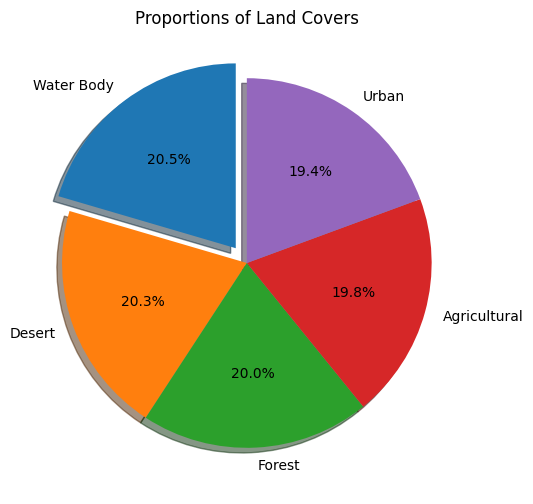

In [ ]:
dflandcover=df['Land Cover']

count=dflandcover.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Land Covers')
plt.show()

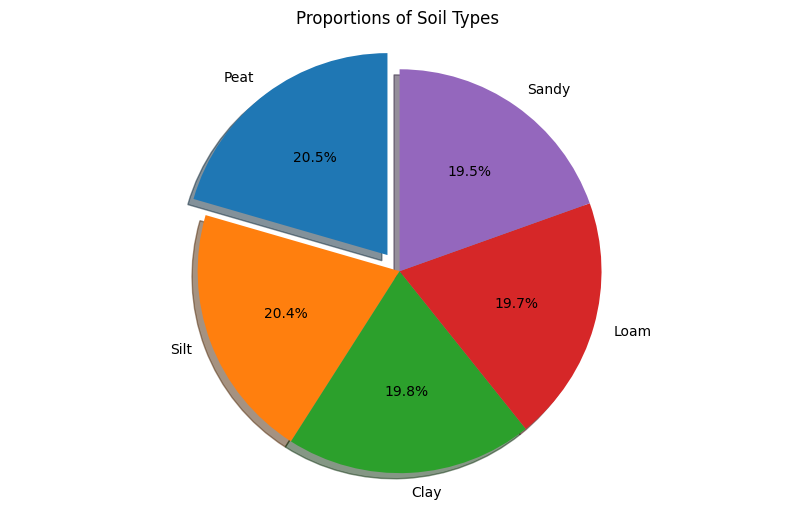

In [ ]:
# Extract the 'Soil Type' column
df_soil = df['Soil Type']

# Count the occurrences of each soil type
soil_counts = df_soil.value_counts()

# Set up the pie chart parameters
plt.figure(figsize=(10, 6))
plt.pie(
    soil_counts,
    labels=soil_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=[0.1] + [0] * (len(soil_counts) - 1)  # Explode the first slice
)

# Title and display the pie chart
plt.title('Proportions of Soil Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


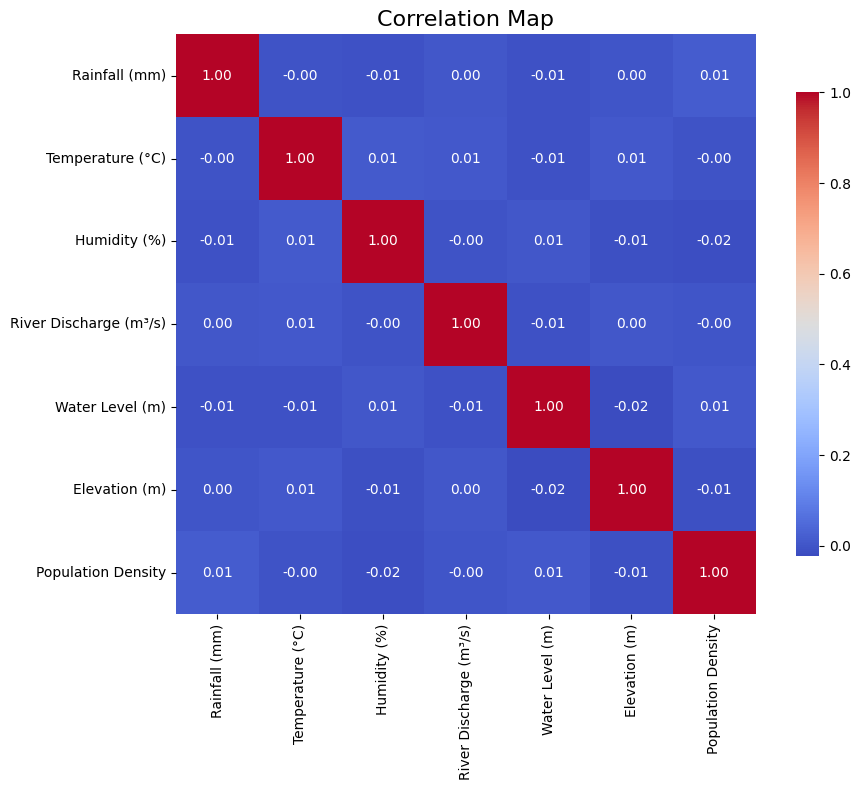

In [ ]:
# Select relevant columns for correlation analysis
features = df[['Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
                'River Discharge (m³/s)', 'Water Level (m)',
                'Elevation (m)', 'Population Density']]

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',  # Adding a color map for better visualization
    square=True,      # Ensures the cells are square-shaped
    cbar_kws={'shrink': .8}  # Optional: adjusts color bar size
)

# Add a title
plt.title("Correlation Map", fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


<ipython-input-16-e1362a7670b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


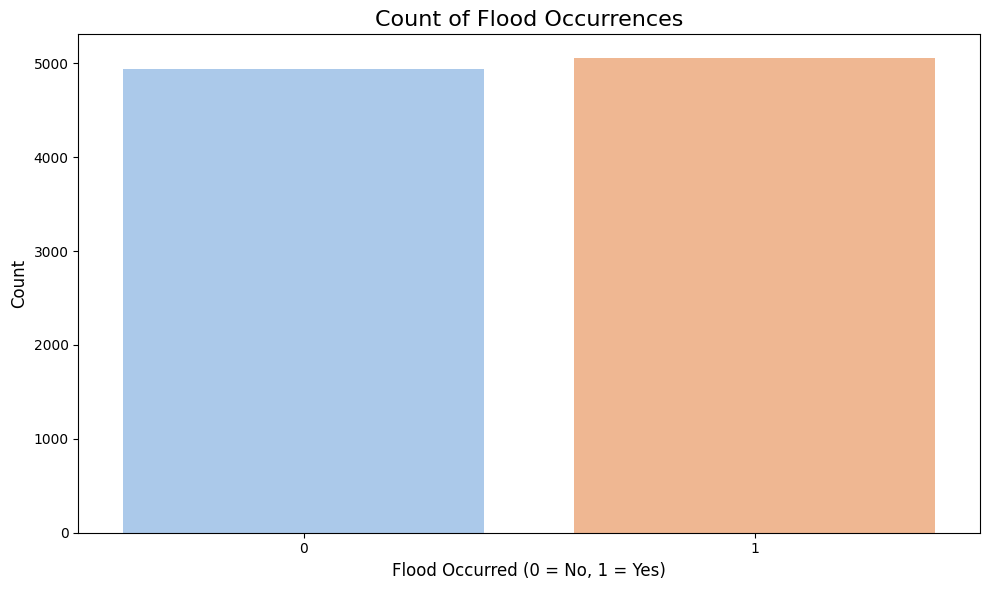

In [ ]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(
    x='Flood Occurred',
    data=df,
    palette='pastel'  # Optional: choose a color palette for better aesthetics
)

# Add labels and title
plt.xlabel('Flood Occurred (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Flood Occurrences', fontsize=16)

# Display the plot
plt.tight_layout()  # Optional: adjust layout for better spacing
plt.show()


<ipython-input-17-c733ce95defb>:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


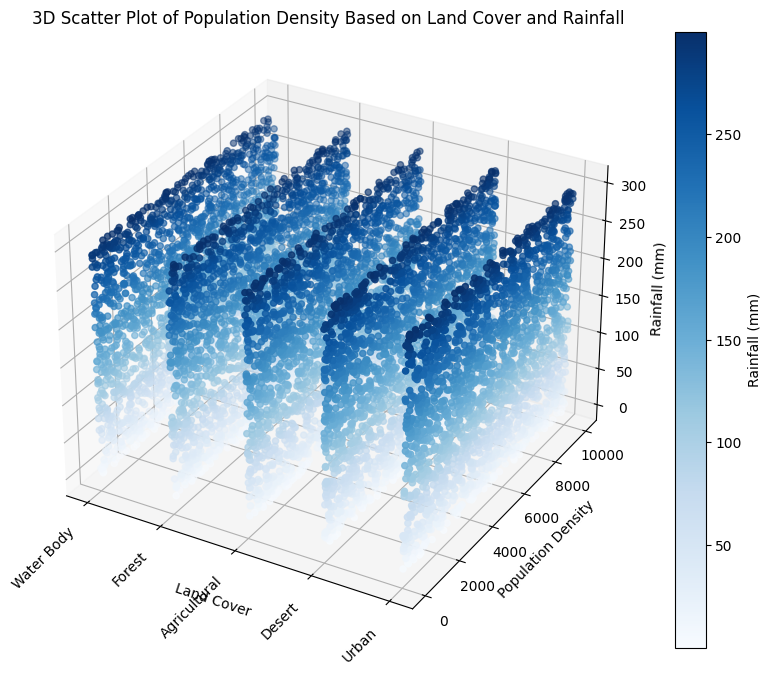

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Land Cover']  # Categorical variable for x-axis
y = df['Population Density']  # Continuous variable for y-axis
z = df['Rainfall (mm)']  # Example third variable for z-axis

# Convert 'Land Cover' to numerical categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=z, cmap='Blues', marker='o')

# Set axis labels
ax.set_xlabel('Land Cover')
ax.set_ylabel('Population Density')
ax.set_zlabel('Rainfall (mm)')

# Set title
ax.set_title('3D Scatter Plot of Population Density Based on Land Cover and Rainfall')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Land Cover'].unique())))
ax.set_xticklabels(df['Land Cover'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Rainfall (mm)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-18-5108fdc570cd>:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


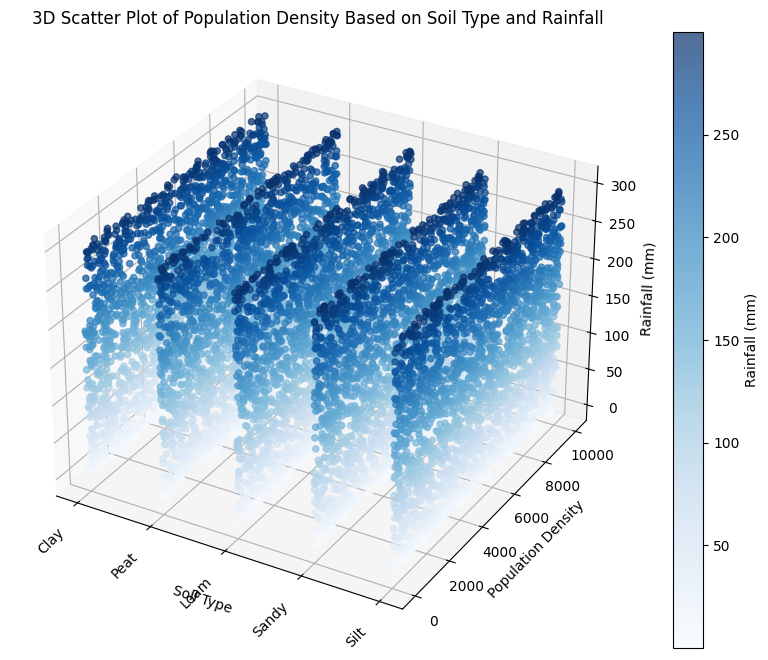

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Soil Type']  # Categorical variable for x-axis
y = df['Population Density']  # Continuous variable for y-axis
z = df['Rainfall (mm)']  # Example third variable for z-axis

# Convert 'Soil Type' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=z, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Soil Type')
ax.set_ylabel('Population Density')
ax.set_zlabel('Rainfall (mm)')

# Set title
ax.set_title('3D Scatter Plot of Population Density Based on Soil Type and Rainfall')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Soil Type'].unique())))
ax.set_xticklabels(df['Soil Type'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Rainfall (mm)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-19-3d1c1f8ec5fd>:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


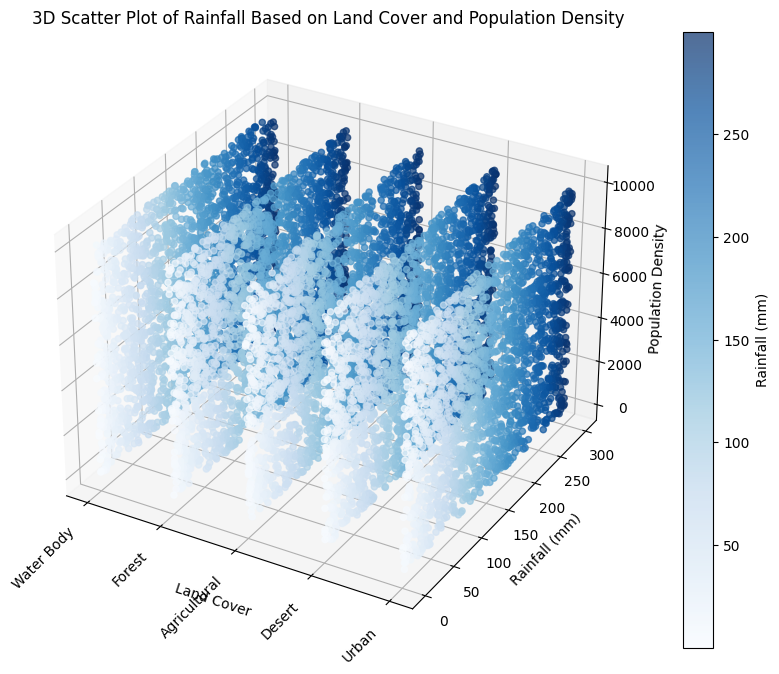

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Land Cover']  # Categorical variable for x-axis
y = df['Rainfall (mm)']  # Continuous variable for y-axis
z = df['Population Density']  # Example third variable for z-axis

# Convert 'Land Cover' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Land Cover')
ax.set_ylabel('Rainfall (mm)')
ax.set_zlabel('Population Density')

# Set title
ax.set_title('3D Scatter Plot of Rainfall Based on Land Cover and Population Density')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Land Cover'].unique())))
ax.set_xticklabels(df['Land Cover'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Rainfall (mm)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-20-676873012b6b>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


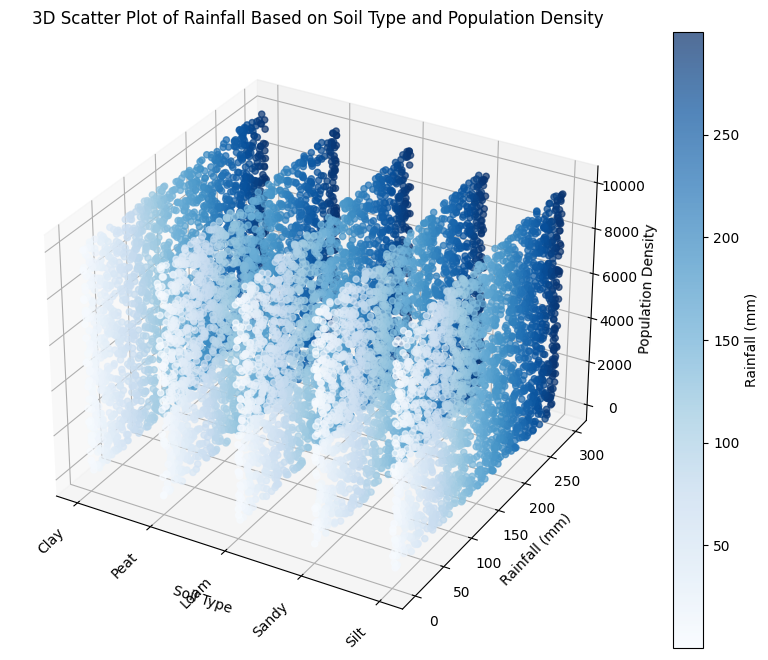

In [ ]:
# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Soil Type']  # Categorical variable for x-axis
y = df['Rainfall (mm)']  # Continuous variable for y-axis
z = df['Population Density']  # Example third variable for z-axis

# Convert 'Soil Type' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Soil Type')
ax.set_ylabel('Rainfall (mm)')
ax.set_zlabel('Population Density')

# Set title
ax.set_title('3D Scatter Plot of Rainfall Based on Soil Type and Population Density')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Soil Type'].unique())))
ax.set_xticklabels(df['Soil Type'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Rainfall (mm)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-21-cb9ef51521bf>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


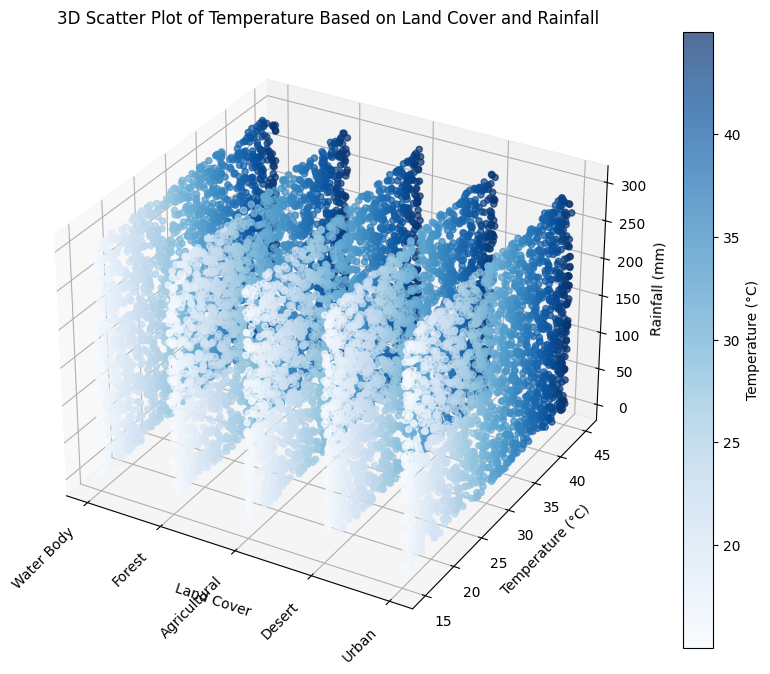

In [ ]:
# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Land Cover']  # Categorical variable for x-axis
y = df['Temperature (°C)']  # Continuous variable for y-axis
z = df['Rainfall (mm)']  # Example third variable for z-axis

# Convert 'Land Cover' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Land Cover')
ax.set_ylabel('Temperature (°C)')
ax.set_zlabel('Rainfall (mm)')

# Set title
ax.set_title('3D Scatter Plot of Temperature Based on Land Cover and Rainfall')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Land Cover'].unique())))
ax.set_xticklabels(df['Land Cover'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature (°C)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-22-cefcfa725020>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


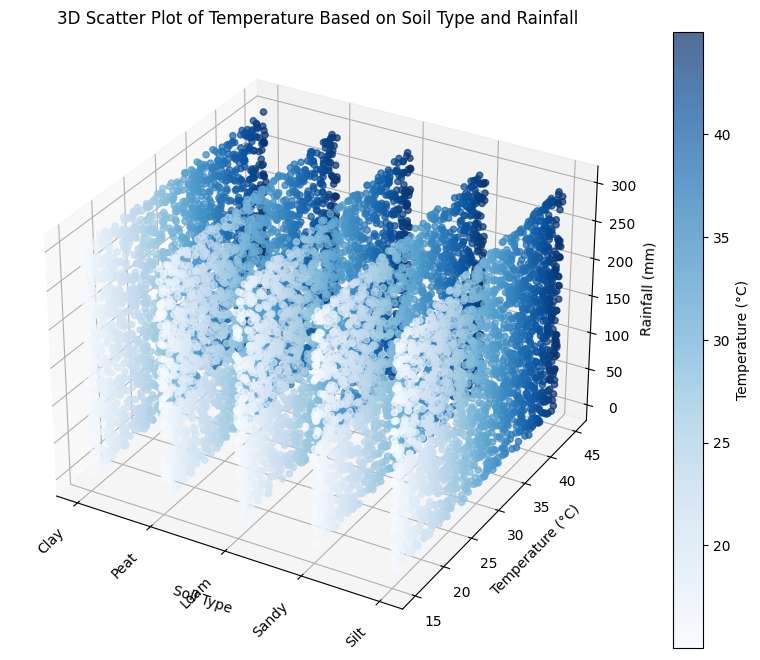

In [ ]:
# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Soil Type']  # Categorical variable for x-axis
y = df['Temperature (°C)']  # Continuous variable for y-axis
z = df['Rainfall (mm)']  # Example third variable for z-axis

# Convert 'Soil Type' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Soil Type')
ax.set_ylabel('Temperature (°C)')
ax.set_zlabel('Rainfall (mm)')

# Set title
ax.set_title('3D Scatter Plot of Temperature Based on Soil Type and Rainfall')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Soil Type'].unique())))
ax.set_xticklabels(df['Soil Type'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature (°C)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-23-ff9d3403afa3>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


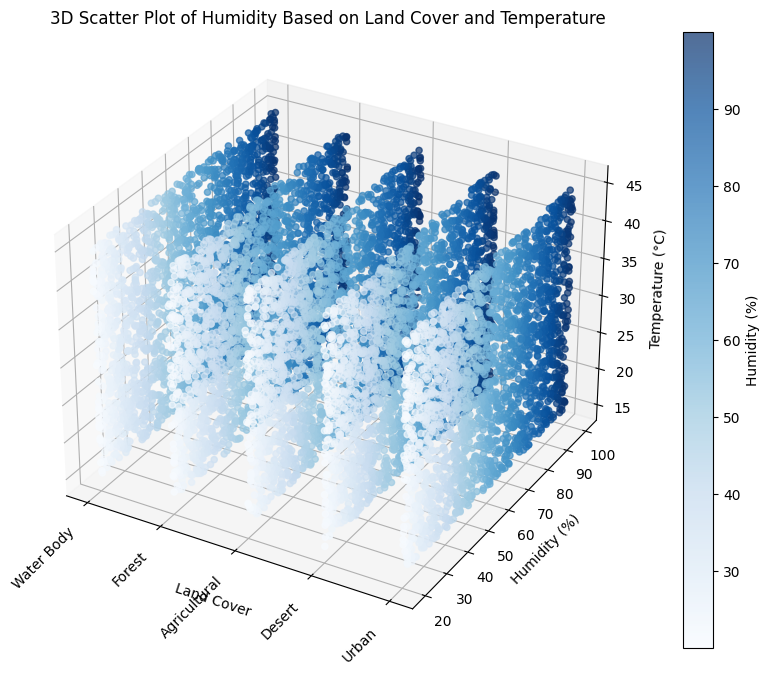

In [ ]:
# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Land Cover']  # Categorical variable for x-axis
y = df['Humidity (%)']  # Continuous variable for y-axis
z = df['Temperature (°C)']  # Example third variable for z-axis

# Convert 'Land Cover' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Land Cover')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Temperature (°C)')

# Set title
ax.set_title('3D Scatter Plot of Humidity Based on Land Cover and Temperature')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Land Cover'].unique())))
ax.set_xticklabels(df['Land Cover'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Humidity (%)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-24-0ba9bd803ba4>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


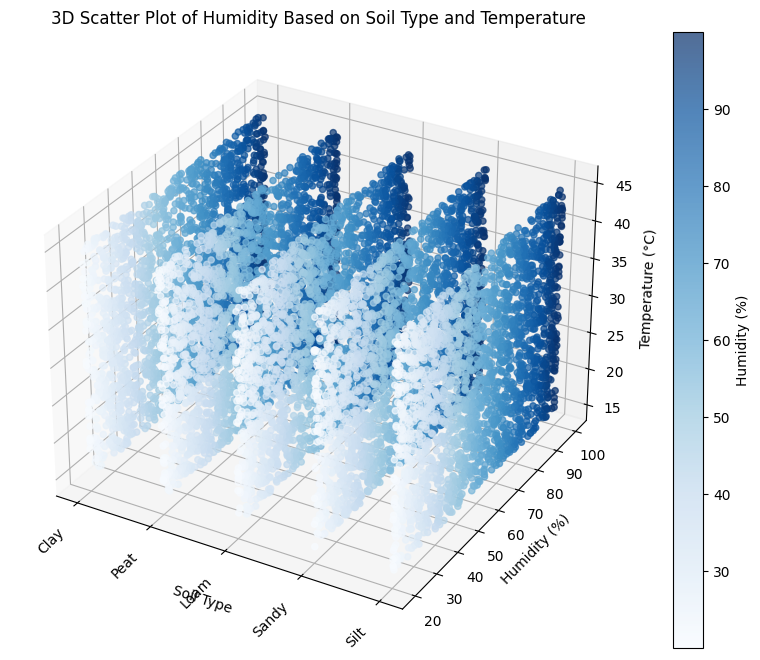

In [ ]:
# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Soil Type']  # Categorical variable for x-axis
y = df['Humidity (%)']  # Continuous variable for y-axis
z = df['Temperature (°C)']  # Example third variable for z-axis

# Convert 'Soil Type' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Soil Type')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Temperature (°C)')

# Set title
ax.set_title('3D Scatter Plot of Humidity Based on Soil Type and Temperature')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Soil Type'].unique())))
ax.set_xticklabels(df['Soil Type'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Humidity (%)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-25-023d27127cdb>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


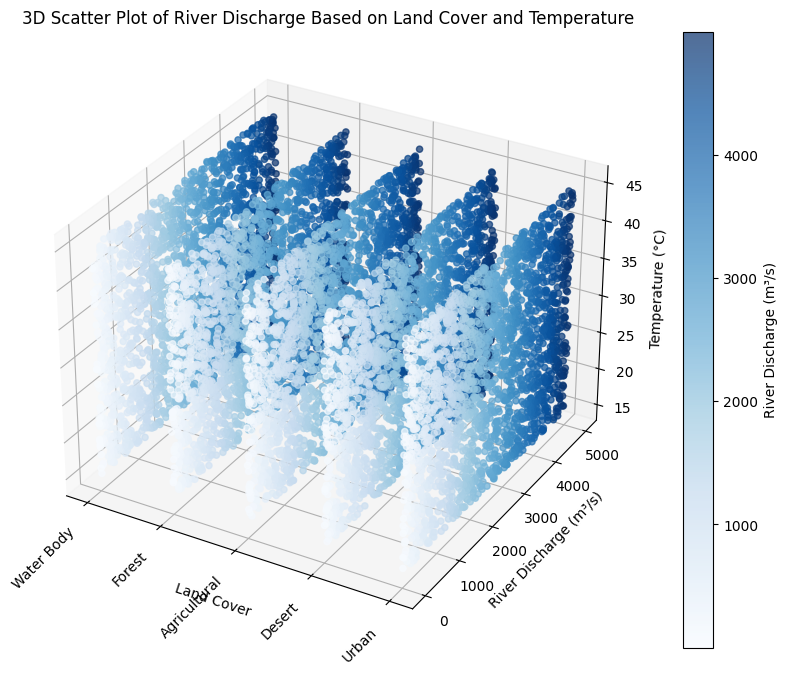

In [ ]:
# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Land Cover']  # Categorical variable for x-axis
y = df['River Discharge (m³/s)']  # Continuous variable for y-axis
z = df['Temperature (°C)']  # Example third variable for z-axis

# Convert 'Land Cover' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Land Cover')
ax.set_ylabel('River Discharge (m³/s)')
ax.set_zlabel('Temperature (°C)')

# Set title
ax.set_title('3D Scatter Plot of River Discharge Based on Land Cover and Temperature')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Land Cover'].unique())))
ax.set_xticklabels(df['Land Cover'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('River Discharge (m³/s)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-26-af9f30622668>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


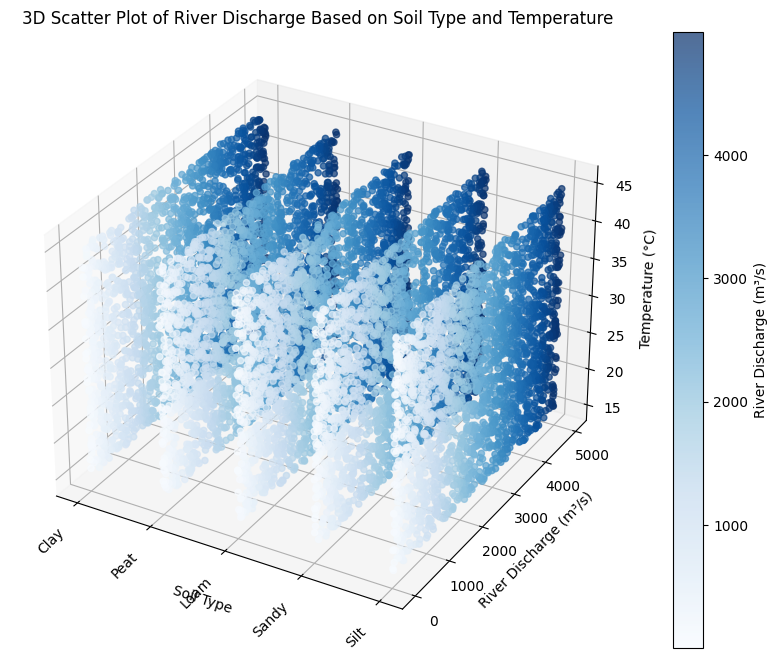

In [ ]:
# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Soil Type']  # Categorical variable for x-axis
y = df['River Discharge (m³/s)']  # Continuous variable for y-axis
z = df['Temperature (°C)']  # Example third variable for z-axis

# Convert 'Soil Type' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Soil Type')
ax.set_ylabel('River Discharge (m³/s)')
ax.set_zlabel('Temperature (°C)')

# Set title
ax.set_title('3D Scatter Plot of River Discharge Based on Soil Type and Temperature')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Soil Type'].unique())))
ax.set_xticklabels(df['Soil Type'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('River Discharge (m³/s)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


**Bargraph Eveluation**

<ipython-input-28-7c1e0588c4d8>:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


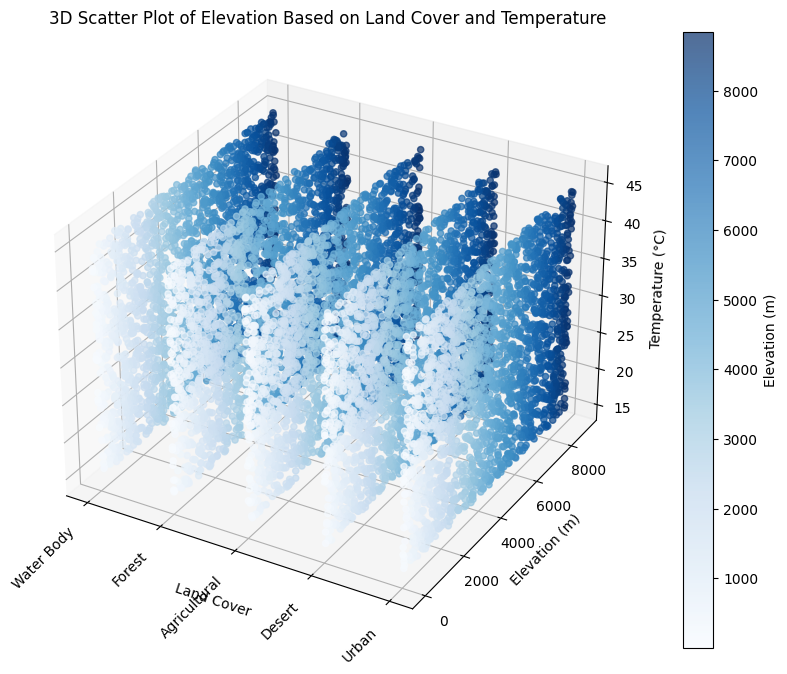

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Land Cover']  # Categorical variable for x-axis
y = df['Elevation (m)']  # Continuous variable for y-axis
z = df['Temperature (°C)']  # Example third variable for z-axis

# Convert 'Land Cover' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Land Cover')
ax.set_ylabel('Elevation (m)')
ax.set_zlabel('Temperature (°C)')

# Set title
ax.set_title('3D Scatter Plot of Elevation Based on Land Cover and Temperature')

# Customizing ticks on the x-axis
ax.set_xticks(range(len(df['Land Cover'].unique())))
ax.set_xticklabels(df['Land Cover'].unique(), rotation=45, ha='right')

# Show color bar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Elevation (m)')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-29-369d8a399fff>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


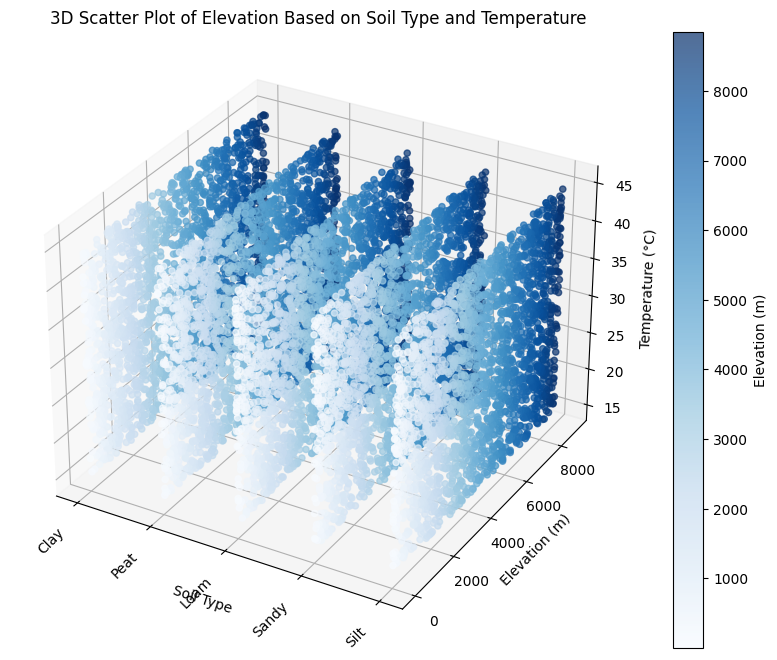

In [ ]:
# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the plot
x = df['Soil Type']  # Categorical variable for x-axis
y = df['Elevation (m)']  # Continuous variable for y-axis
z = df['Temperature (°C)']  # Example third variable for z-axis

# Convert 'Soil Type' to numeric categories for plotting
x_numeric = pd.factorize(x)[0]

# Create the scatter plot
scatter = ax.scatter(x_numeric, y, z, c=y, cmap='Blues', marker='o', alpha=0.7)

# Set axis labels
ax.set_xlabel('Soil Type')
ax.set_ylabel('Elevation (m)')
ax.set_zlabel('Temperature (°C)')

# Set title
ax.set_title('3D Scatter Plot of Elevation Based on Soil Type and Temperature')

# Customizing ticks on the x-axis to show Soil Type labels
ax.set_xticks(range(len(df['Soil Type'].unique())))
ax.set_xticklabels(df['Soil Type'].unique(), rotation=45, ha='right')

# Show color bar for elevation values
cbar = plt.colorbar(scatter)
cbar.set_label('Elevation (m)')

# Improve layout and display the plot
plt.tight_layout()
plt.show()


**Predicting Flood Occurrence Using Environmental and Geographical Data: A Basic Machine Learning Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define features and target variable
X = df.drop(columns=['Flood Occurred', 'Latitude', 'Longitude'])
y = df['Flood Occurred']

# Define categorical and numerical columns
categorical_cols = ['Land Cover', 'Soil Type']
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.difference(categorical_cols)

# Create a preprocessor for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Model Accuracy: 51.45

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51       966
           1       0.53      0.52      0.52      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.52      0.51      0.51      2000


Confusion Matrix:
 [[496 470]
 [501 533]]


In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Example input for flood prediction
new_data = pd.DataFrame({
    'Rainfall (mm)': [150],
    'Temperature (°C)': [30],
    'Humidity (%)': [70],
    'River Discharge (m³/s)': [20000],
    'Water Level (m)': [5],
    'Elevation (m)': [200],
    'Population Density': [5000],
    'Infrastructure': [1],
    'Historical Floods': [1],
    'Land Cover_Agricultural': [1],
    'Land Cover_Desert': [0],
    'Land Cover_Forest': [0],
    'Land Cover_Urban': [0],
    'Land Cover_Water Body': [0],
    'Soil Type_Clay': [0],
    'Soil Type_Loam': [0],
    'Soil Type_Peat': [0],
    'Soil Type_Sandy': [0],
    'Soil Type_Silt': [0],
})

# Scaling the new data
new_data_scaled = scaler.transform(new_data)

# Predict flood occurrence
flood_prediction = model.predict(new_data_scaled)
print(f"Flood Prediction: {flood_prediction}")


Flood Prediction: [1]


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Display message
print("Map Of All Places Where Floods Occurred and The Precipitation is Higher Than 200 mm")

# Threshold for high precipitation
precipitation_threshold = 200

# Filter data for flood occurrences with high precipitation
high_precipitation_data = df[(df['Rainfall (mm)'] > precipitation_threshold) & (df['Flood Occurred'] == 1)]

# Define map center based on mean latitude and longitude of filtered data
map_center = [high_precipitation_data['Latitude'].mean(), high_precipitation_data['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

# Add a marker cluster layer to the map
marker_cluster = MarkerCluster().add_to(my_map)

# Loop through each row in the filtered data and add markers
for _, row in high_precipitation_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(f"Rainfall: {row['Rainfall (mm)']} mm, Temp: {row['Temperature (°C)']} °C, "
               f"Humidity: {row['Humidity (%)']}%, Water Level: {row['Water Level (m)']}, "
               f"Elevation: {row['Elevation (m)']}")
    ).add_to(marker_cluster)

# Display the map
my_map


Map Of All Places Where Floods Occurred and The Precipitation is Higher Than 200 mm
